This exercise is built for CP-101 Industrial Land Report https://www.planningfor.jobs/ <br>
The goal of this exercise is to work with joining 3 tabular data: tax accessor data, zoning data and business data for 2011. We will also explore spatial joining techniques with the focus on Alameda county. 

## Data Wrangling: Dataframe Merge, Join, Pivot, etc and Spatial Join
Today we will cover the following topic:
- Merge & Join
- Tranpose & Pivot & Concatenate
- Groupby & Aggregate
- Attribute & Spatial Join 

First, let's import the necessary packages. We will be using Pandas, a popular dataframe manipulation. If you do not have these packages, you'd need to install them, for example, run `pip install pandas` to install the pandas package before running the import cell below.

In [187]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Now, let's import the data that we will be using in this excercise. Remember to practice good naming convention. <br>
We will need to know where our current location is first to read in the files. Using `pwd()` will print the working directory.

In [4]:
pwd()

'C:\\Users\\alice\\Downloads\\CP_101lab'

Within this directory lives this excercise notebook and another folder labelled files, I have saved the datasets in there. Let's read them read into this notebook. Note*: change your data path to where the files live. 

In [188]:
tax_data = pd.read_csv(r"files\data\Alameda_taxaccessor_data.csv", low_memory=False)
zoning_data = pd.read_csv(r"files\data\Alameda_zoning_data.csv", low_memory=False)
business_data = pd.read_csv(r"files\data\Alameda_business_data.csv", low_memory=False)
alameda_shp = gdp.read_file(r"files\data\Alameda_shapefile\Alameda_Complete.shp", low_memory=False)

As in the earlier jupyter excercises, we went over how to access the data in a dataframe format. Let's check our 4 dataframes with these techniques: `head()`, `tail()`, `iloc[]` and `loc[]`.

In [47]:
tax_data.tail()

,apn,dunsnumber,sa_property_id,sa_owner_1,sa_owner_1_mid,sa_owner_1_last,sa_owner_1_sp_first,sa_owner_2,sa_owner_2_first,sa_ownership_status_code,...,sa_val_transfer,sa_doc_nbr_fmt,sa_date_noval_transfer,sa_doc_nbr_noval,sa_x_coord,sa_y_coord,sa_census_tract,sa_census_block_group,minor_civil_division_code,fips_place_code
27348,461-15-26-1,969932024,38448285.0,MKD CORP PLACE,NaN,NaN,NaN,MKD INVESTMENT,MKD INVESTMENT,LP,...,0.0,200973,NaN,NaN,122.11102,37.624001,437101.0,1.0,91260.0,33000.0
27349,99-1325-82,969948558,38398379.0,COMMON AREA OF POR PM 5883 72 THRU 81,NaN,NaN,NaN,CUPERTINO CAPITL INC,CUPERTINO CAPITL INC,NaN,...,0.0,000*185561,NaN,NaN,121.73676,37.700550,451504.0,1.0,91660.0,41992.0
27350,53-1655-9,969975929,38263178.0,TEMESCAL LLC & CONTRA COSTA INDUSTRIAL PARK LTD,NaN,NaN,NaN,HALL EQUITIES GROUP,HALL EQUITIES GROUP,CO,...,0.0,315476,NaN,NaN,122.29323,37.853889,422000.0,1.0,90200.0,6000.0
27351,99B-8110-15,969995427,38406061.0,LIVERMORE LAWRENCE PROPERTIES,NaN,NaN,NaN,"NORMAN,S BAILEY",S,LP,...,0.0,557497,NaN,NaN,121.70596,37.710804,451101.0,1.0,91660.0,41992.0
27352,99-1325-82,969997774,38398379.0,COMMON AREA OF POR PM 5883 72 THRU 81,NaN,NaN,NaN,CUPERTINO CAPITL INC,CUPERTINO CAPITL INC,NaN,...,0.0,000*185561,NaN,NaN,121.73676,37.700550,451504.0,1.0,91660.0,41992.0


In [17]:
zoning_data.head()

,apn,dunsnumber,company,address,city,sit_full_s,sit_city,sit_zip,xcoord,ycoord,minx,miny,maxx,maxy,indzoning,category,area,area_updat,county
0,99-1331-18,1043780,AIRPORT MINI STORAGE,1491 RUTAN DR,LIVERMORE,,Livermore,94551,-121.79942,37.693668,-121.80021,37.693077,-121.79876,37.694302,AIR-SE/AIR-OP,transp,3.833827,3.833827,Alameda
1,946-1250-37,1118400,HANSON BUILDING MATERIALS AMER,3000 BUSCH RD,PLEASANTON,3110 BUSCH RD,Pleasanton,94566,-121.85338,37.675373,-121.85358,37.675129,-121.85317,37.675617,I-G-40,medium,0.459112,0.459112,Alameda
2,57-2097-2-1,1251532,BERKELEY SENIOR CENTER CITY,1900 6TH ST,BERKELEY,1904 6TH ST,Berkeley,94710,-122.29836,37.868870,-122.29871,37.868526,-122.29802,37.869213,MU-R,MU-residential,0.758505,0.758505,Alameda
3,79A-541-39-2,1258479,SADERMA LEA SHOE FINDINGS INC,1650 NEPTUNE DR,SAN LEANDRO,1601 AURORA DR,San Leandro,94577,-122.19117,37.708370,-122.19223,37.707546,-122.18992,37.709194,IG,light,6.327419,6.327419,Alameda
4,439-66-6-4,1368039,LEE ON INC,1680 W WINTON AVE STE 11,HAYWARD,1680 W WINTON AVE,Hayward,94545,-122.12457,37.651836,-122.12498,37.650761,-122.12415,37.652908,I,medium,3.935750,3.935750,Alameda


In [144]:
#iloc works based on integer positioning of row, column. Here we want row 5 to 8 and all columns they have.
business_data.iloc[5:8, :]

,apn,dunsnumber,fid,state,fullname,tradename,zipcode,zip4,officer,title,...,industry,industrygroup,Unnamed: 36,saleshere,pubpriv,firstyear,lastyear,address_first,tractce,sizecat
5,439-75-68,1433023,229438.0,CA,Industrial District (Defined in Section 1.1600),,94545,2745,JULIE SCHULTZ,MANAGER,...,Household antenna installation and service,Electrical Repair Shops,NaN,1446800,N,2000,2001,3462 DIABLO AVE,437101,2_20to49
6,475-174-38,1526594,258243.0,CA,Industrial District (Defined in Section 1.1600),,94544,7002,DON WIES,PRESIDENT,...,"Office furniture, except wood",Office Furniture,NaN,6122500,N,1989,2002,30776 HUNTWOOD AVE,438203,3_50to99
7,463-45-43-2,1555288,333767.0,CA,Light Industrial,,94587,1234,DEAN YAMAMURA,CHIEF EXECUTIVE OFFICER,...,Manufacturers' institute,Business Associations,NaN,100000,N,2002,2013,31 AHERN AVE,440333,01_LT5


In [189]:
#loc select data based of labels. Here we used rows of label 0 to 2 and columns of label 'APN' to 'geometry'
alameda_shp.loc[:2, 'APN':'geometry']

,APN,APN2,SIT_FULL_S,SIT_CITY,SIT_ZIP,Xcoord,Ycoord,minX,minY,maxX,maxY,INDZoning,geometry
0,48-6298-3-2,048 629800302,None,Oakland,94605,-122.124041,37.755725,-122.124247,37.755582,-122.123838,37.755861,None,"POLYGON ((-122.12384 37.75571, -122.12417 37.7..."
1,48-6313-23,048 631302300,4728 SCOTIA AVE,Oakland,94605,-122.125207,37.754515,-122.125372,37.754266,-122.125042,37.754769,None,"POLYGON ((-122.12504 37.75429, -122.12520 37.7..."
2,48-6313-87,048 631308700,10834 GOLF LINKS RD,Oakland,94605,-122.126525,37.753630,-122.126726,37.753496,-122.126325,37.753764,None,"POLYGON ((-122.12635 37.75366, -122.12632 37.7..."


For a sanity check on a dataset's general statistics to observe any outliners, you can use `describe()`. Here, we check the business data, some of the columns might not make sense to have their general stats checked like zipcode or fid.

In [146]:
business_data.describe()

,dunsnumber,fid,zipcode,zip4,citycode,naics11,Unnamed: 36,firstyear,lastyear,tractce
count,2.735300e+04,23103.000000,27353.000000,27353.000000,27353.000000,11493.000000,0.0,27353.000000,27353.000000,27353.000000
mean,3.320022e+08,206667.700602,94578.106570,3727.512631,64226.519980,492227.688071,NaN,1999.781852,2007.557562,448427.953789
std,3.549055e+08,114955.714456,50.290204,2221.027606,2131.447663,163005.047658,NaN,7.873964,6.619593,101603.551115
min,1.043780e+06,295.000000,94501.000000,0.000000,60161.000000,221.000000,NaN,1989.000000,1990.000000,400700.000000
25%,4.576310e+07,108094.500000,94544.000000,1814.000000,63077.000000,423430.000000,NaN,1992.000000,2003.000000,422000.000000
50%,1.366674e+08,187553.000000,94568.000000,3170.000000,63545.000000,488999.000000,NaN,2001.000000,2010.000000,437101.000000
75%,7.866707e+08,329699.000000,94607.000000,5607.000000,65687.000000,561312.000000,NaN,2007.000000,2013.000000,441503.000000
max,9.699978e+08,395776.000000,94710.000000,9998.000000,68471.000000,999999.000000,NaN,2012.000000,2013.000000,983200.000000


Before we join these 3 datasets, let's look at the different types of join.

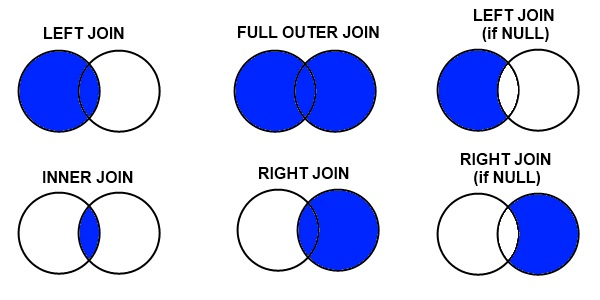

In [15]:
Image(filename='files/join-types.jpg')

| Option        | Behavior      |
| ------------- |:-------------:|
| `inner` | Use only the key combination observed in both sides |
| `left`  | Use all key combinations found in the left table    | 
| `right` | Use all key combinations found in the right table   |  
| `outer` | Use all key combinations observed in both tables together |


### Merge

*Merge* connects rows in DataFrames based on one or more keys. This is similar to SQL and other relational databases *join* operations. <br>
Here is an example of a *one-to-one* join where each label appears once in each table. 

In [44]:
df1 = pd.DataFrame({'key': ['a', 'b', 'c', 'd', 'f'],
                   'value1': range(5)})
df2 = pd.DataFrame({'key': ['a', 'b', 'f'],
                   'value2': range(3)})
df1

,key,value1
0,a,0
1,b,1
2,c,2
3,d,3
4,f,4


In [22]:
#This is a comment, here is dataframe 2 that we will use to merge with dataframe 1
df2

,key,value2
0,a,0
1,b,1
2,f,2


You can check for the data types of each column where column of mixed types are stored as 'object'. <br>
There are several data types: *float, integer, string, boolean, datetime*, etc. <br>
You can double check if the key is unique before joining to prevent incorrect join operations.


In [23]:
#Here, we see that key is a type of object and value is a type of integer
df1.dtypes

key       object
value1     int64
dtype: object

In [24]:
#here, the key of df1 is a unique key which is what we want
df1['key'].is_unique

True

Explicitly specify the overlapping column name as key is a good practice. If not specified, merge will find the column that's overlapped to merge on. <br>
You can also use ? to check what the operation does and is arguments as well as examples.

In [25]:
?pd.merge

In [26]:
#This will give a resulting dataframe of only keys that matched between 2 dataframes
mergedf = pd.merge(df1, df2, on='key')
mergedf

,key,value1,value2
0,a,0,0
1,b,1,1
2,f,4,2


By default, merge does an `inner` join; the keys in the result are the intersection or the common key combinations found in both tables. Lets' try a `left`, `right` and `outer` join. <br>

| Option        | Behavior      |
| ------------- |:-------------:|
| `left`  | will merge using all key combinations found in left table (ex: df1)    | 
| `right` | join will merge using all key combinations found in right table (ex: df2)   |  
| `outer` | merge using all key combinations observed in both tables together |


In [27]:
merge_left = pd.merge(df1, df2, how='left')
merge_left

,key,value1,value2
0,a,0,0.0
1,b,1,1.0
2,c,2,NaN
3,d,3,NaN
4,f,4,2.0


In [28]:
merge_right = pd.merge(df1, df2, how='right')
merge_right

,key,value1,value2
0,a,0,0
1,b,1,1
2,f,4,2


In [29]:
merge_outer = pd.merge(df1, df2, how='outer')
merge_outer

,key,value1,value2
0,a,0,0.0
1,b,1,1.0
2,c,2,NaN
3,d,3,NaN
4,f,4,2.0


*Many-to-one*: What if we have the first dataframe with many multiple rows labelled 'a' and 'b', but the second dataframe with only one row for each value in the key column?

In [30]:
df1_many_to_one = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                   'value1': range(7)})
df2_many_to_one = pd.DataFrame({'key': ['a', 'b', 'd'],
                   'value2': range(3)})
df1_many_to_one

,key,value1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [25]:
df2_many_to_one

,key,value2
0,a,0
1,b,1
2,d,2


In [35]:
df3_many_to_one = pd.merge(df1_many_to_one, df2_many_to_one, on='key')
df3_many_to_one

,key,value1,value2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Here we can now join the 3 datasets based on one uniform apn. We will do a many-to-one, inner join as we have done above. Again, by default, merge will do an inner join based on a overlapping key. However, before we merge these large datasets, we should double check if our key is unique.

In [53]:
tax_data['apn'].is_unique

False

The APN number column has overlapping apns, we cannot merge non-unique keys or the the resulting dataframe would be a many-to-one merge, resulting in a huge, incomprehensible dataframe that crashes the kernel. Let's check the *dunsnumber* to see if it is unique.

In [56]:
tax_data['dunsnumber'].is_unique

True

In [28]:
zoning_data['dunsnumber'].is_unique

True

In [29]:
business_data['dunsnumber'].is_unique

True

It seems that we can use *dunsnumber* to do a merge on. Since you can only perform `merge()` on two datasets per call, will will join the 3 files in 2 steps: merge the tax_data to the business_data, then merge this newly merged dataframe to zoning_data.

In [151]:
#TODO: join the tax to business data first
Alameda_tax_business = pd.merge(tax_data, business_data, on='dunsnumber')

In [152]:
#TODO: join the earlier dataframe to the zoning data
Alameda_merged_data = pd.merge(Alameda_tax_business, zoning_data, on='dunsnumber')

You can now save the joined dataframe to a csv file. You can list the file path, `index=False` tells pandas that we don't want the row to be indexed in our file.

In [38]:
#TODO:
Alameda_merged_data.to_csv(r"files\data\Alameda_merged_data.csv", index=False)

### Join

*Joining* is a method for combining together many DataFrame objects having the same or similar indexes but non-overlapping column. While similar to the pandas *merge* method, join **CANNOT** be used by calling `pandas.join()`, join **CAN** only be called by `dataframe.join()`, meaninn you have to have a dataframe to call the join on. Though it is sometimes more convenient because you can join multiple dataframes in one line. <br>
Moreover, `join()` will use index to join on and `merge()` uses an `key` argument that we can specify.

In [7]:
join_df1 = pd.DataFrame([[1, 2], [3,4], [5,6]],
                       index=['a','c', 'e'],
                       columns=['Ohio', 'Nevada'])
join_df1

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [8]:
join_df2 = pd.DataFrame([[7,8],[9,10],[11,12],[13,14]],
                       index=['b','c','d','e'],
                       columns=['Missouri', 'Alabama'])
join_df2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


By default, join without specifying the `how` argument will result in a join keeping the left dataframe index. <br> Here, we have `join_df1` joining with `join_df2` which results in a final dataframe keeping the index of `join_df` and the data of `join_df2` that matches those indexes.

In [9]:
joiningdfs = join_df1.join(join_df2)
joiningdfs

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
c,3,4,9.0,10.0
e,5,6,13.0,14.0


As mentioned, outer join results in no information loss.

In [10]:
outerjoin = join_df1.join(join_df2, how='outer')
outerjoin

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [11]:
join_df3 = pd.DataFrame([[11,12],[13,14],[15,16]],
                       index=['a','c','e'],
                       columns=['New York', 'Oregon'])
join_df3

,New York,Oregon
a,11,12
c,13,14
e,15,16


With `join()`, you can join multiple DataFrames, unlike merge. 

In [12]:
multi_join = join_df2.join([join_df1, join_df3], how='outer')
multi_join

,Missouri,Alabama,Ohio,Nevada,New York,Oregon
b,7.0,8.0,NaN,NaN,NaN,NaN
c,9.0,10.0,3.0,4.0,13.0,14.0
d,11.0,12.0,NaN,NaN,NaN,NaN
e,13.0,14.0,5.0,6.0,15.0,16.0
a,NaN,NaN,1.0,2.0,11.0,12.0


To join our Alameda dataframes, we would need to reindex the dataframe to have the common column because `join()` uses index for joining. To do this, we can use `set_index()`. Since we have overlapping apn in each dataframe, the join function will throw an error, to correct this we can drop the apn column by calling `drop()`. <br>
Remember, drop() needs an additional argument where *axis{0 or ‘index’, 1 or ‘columns’}, default 0*, if you're confused, use `?pd.DataFrame.drop`

In [69]:
#TODO: set index prior to joining, dropping apn column to prevent ValueError of overlapping values in the apn column.
tax_data = tax_data.set_index('dunsnumber').drop('apn', axis=1)
zoning_data = zoning_data.set_index('dunsnumber').drop('apn', axis=1)
business_data = business_data.set_index('dunsnumber').drop('apn', axis=1)

In [64]:
#TODO: join multiple dataframe in one line
Alameda_joined_data = tax_data.join([zoning_data, business_data], how='inner')

In [66]:
#TODO: 
Alameda_joined_data.to_csv(r"files\data\Alameda_joined_data.csv")

By now you should have two saved csv files: Alameda_merged_data and Alameda_joined_data. They both gave us the same result, you've just combined them in two different methods.

### Pivot & Tranpose & Concatenate

Right now, the dataframe is indexed at labels. What if we want to visualize the states as a column. We can use `transpose()` to do this. 

In [66]:
multi_join

,Missouri,Alabama,Ohio,Nevada,New York,Oregon
b,7.0,8.0,NaN,NaN,NaN,NaN
c,9.0,10.0,3.0,4.0,13.0,14.0
d,11.0,12.0,NaN,NaN,NaN,NaN
e,13.0,14.0,5.0,6.0,15.0,16.0
a,NaN,NaN,1.0,2.0,11.0,12.0


In [67]:
multi_join.transpose()

,b,c,d,e,a
Missouri,7.0,9.0,11.0,13.0,NaN
Alabama,8.0,10.0,12.0,14.0,NaN
Ohio,NaN,3.0,NaN,5.0,1.0
Nevada,NaN,4.0,NaN,6.0,2.0
New York,NaN,13.0,NaN,15.0,11.0
Oregon,NaN,14.0,NaN,16.0,12.0


Try it here with your joined Alameda dataframe. Remember, you can use `set_index` and `reset_index()` first to specifically tell pandas which index you would like to transpose.

In [70]:
#TODO: try set_index and transpose functions on Alameda file based on the variable of interest.



We can reshape a dataframe by using the `pivot_table` or `pivot()`.

It would be more useful to use the `pivot_tables` if you want to apply an aggregate function to the values. <br>
Check out the example below.

In [119]:
pivot_df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2012, 2013, 2013],
                   'sale': [55, 40, 84, 31],
                    'size': ['big', 'small','big','small']})
pivot_df

,month,year,sale,size
0,1,2012,55,big
1,4,2012,40,small
2,7,2013,84,big
3,10,2013,31,small


In [121]:
# Here I am using an aggregate function numpy sum
pivot_df.pivot_table(values='sale', index=['year', 'month'],
                    columns=['size'], aggfunc=np.sum)

size         big  small
year month             
2012 1      55.0    NaN
     4       NaN   40.0
2013 7      84.0    NaN
     10      NaN   31.0

In [122]:
# Alternatively, you can just use pivot() and leave out the aggr func
pivot_df.pivot(index='year', columns='month', values='sale')

month,1,4,7,10
year,,,,
2012,55.0,40.0,NaN,NaN
2013,NaN,NaN,84.0,31.0


In [123]:
#TODO: try either method on Alameda joined file based on 3 variables of interest.



*Concatenating* stacks together DataFrame along an axis. To combine (concatenate) the two datasets into a single DataFrame, provided both have the same columns. <br>

In [ ]:
?pd.concat

In [59]:
df1

,key,value1
0,a,0
1,b,1
2,c,2
3,d,3
4,f,4


In [124]:
#By default, concat will use axis 0 (denoting row), stacking the dataframe on top of each other by row. 
#From the concatenated table below, you can see here that from index 1 to 4 is our first table, the following 
#index 5 to 8 is our second table. 
#The index is thrown out of wack, here I reset the index and drop the old index with axis 1 denoting that 
#it's a column.

concatdf = pd.concat([df1, pivot_df], sort=True).reset_index().drop('index', axis=1)
concatdf

,key,month,sale,size,value1,year
0,a,NaN,NaN,NaN,0.0,NaN
1,b,NaN,NaN,NaN,1.0,NaN
2,c,NaN,NaN,NaN,2.0,NaN
3,d,NaN,NaN,NaN,3.0,NaN
4,f,NaN,NaN,NaN,4.0,NaN
5,NaN,1.0,55.0,big,NaN,2012.0
6,NaN,4.0,40.0,small,NaN,2012.0
7,NaN,7.0,84.0,big,NaN,2013.0
8,NaN,10.0,31.0,small,NaN,2013.0


The argument `axis=0` will give us the stacked version (row by row) as above and `axis=1` will give us the side by side (column by column dataframe)

In [126]:
concatdf_axis1 = pd.concat([df1, pivot_df], axis=1)
concatdf_axis1

,key,value1,month,year,sale,size
0,a,0,1.0,2012.0,55.0,big
1,b,1,4.0,2012.0,40.0,small
2,c,2,7.0,2013.0,84.0,big
3,d,3,10.0,2013.0,31.0,small
4,f,4,NaN,NaN,NaN,NaN


In [135]:
#TODO: try filtering for the dataframe(s) you would like to perform concatenation to:



### Percent Change & Sort Values

Pandas has an excellent DataFrame operation called DataFrame.pct_change(). This operation calculates down the column and replace the value with the percent change between itself and the row above it.

In [91]:
pct_change = pd.DataFrame([[11,12,100],[13,14,203],[15,16,391], [39,24,11]],
                       index=['1990','1991','1992','1993'],
                       columns=['New York', 'Oregon', 'California'])
pct_change

,New York,Oregon,California
1990,11,12,100
1991,13,14,203
1992,15,16,391
1993,39,24,11


In [136]:
#we can look at the percent chanage by calling pct_change() function
pct_change = pct_change.pct_change()
pct_change

,New York,Oregon,California
1990,NaN,NaN,NaN
1991,NaN,NaN,NaN
1992,-0.153846,-0.142857,-0.100866
1993,9.400000,2.500000,-2.049410


Now, you can transpose it back to a preferred dataframe by using `transpose()` that we used above. Here we see the percent change across time for two regions.

In [137]:
pct_change_transpose = pct_change.transpose()
pct_change_transpose

,1990,1991,1992,1993
New York,NaN,NaN,-0.153846,9.40000
Oregon,NaN,NaN,-0.142857,2.50000
California,NaN,NaN,-0.100866,-2.04941


Let try to sort out a dataframe using `sort_values()`. Here, we can try sorting the pivot table we had earlier. You'd specify which column to sort by. By default, the dataframe is sorted by smallest first, you can specify the `ascending=False` for largest values first. This function will also sort alphabets.

In [127]:
pivot_df

,month,year,sale,size
0,1,2012,55,big
1,4,2012,40,small
2,7,2013,84,big
3,10,2013,31,small


In [128]:
sorted_df = pivot_df.sort_values(by='year', ascending=False)
sorted_df

,month,year,sale,size
2,7,2013,84,big
3,10,2013,31,small
0,1,2012,55,big
1,4,2012,40,small


In [101]:
#TODO: Try this pct_change & sort values with Alameda joined dataset



### Groupby & Aggregate 

`groupby()` is a neat function that goes hand in hand with an aggregate function just like pivot. Take for example our sorted_df above, we can group by the column name and tell pandas what we would to do with the values across all  other columns that are not grouped.

In [131]:
sorted_df.groupby(['size']).sum()

,month,year,sale
size,,,
big,8,4025,139
small,14,4025,71


In [134]:
#TODO: try groupby and use other aggregate function like mean(), count(), max(), min(), etc



### Attribute & Spatial Join

The geopandas package is built for us to do attribute and spatial join. 

In an attribute join, a GeoDataFrame is combined with a regular DataFrame based on a common variable. This is analogous to normal merging or joining in pandas. To keep the output as a GeoDataFrame, be sure to call the merge with the GeoDataFrame in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.<br>

For example, this is an attribute join with country_shapes being the GeoDataFrame and country_name is the DataFrame:

`country_shapes = country_shapes.merge(country_names, on='iso_a3')`

In this exercise, our Alameda GeoDataFrame and Alameda DataFrame don't have a unique key for our merge `on = " "` argument, it would not make sense for us to do a attribute join. 

In a Spatial Join, two GeoDataFrames are combined based on their spatial relationship to one another from their own geometry columns. This spatial join can also be done using ArcMap or QGIS software that you can download. The result is a shapefile that we can later save for our GIS analysis. <br>

First, let's look at the different types of arguments og `sjoin.()`:



| Argument | Input | Behavior |
|----------|--------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `op` | *intersects* | <div style="text-align: justify"> The attributes will be joined if the boundary and  interior of the object intersect <br> in any way with the boundary and/or  interior of the other object.  </div> |
|  | *within* | <div style="text-align: justify"> The attributes will be joined if the object’s boundary and interior <br> intersect only with the interior of the other object  (not its boundary or exterior).  </div>  |
|  | *contains* | <div style="text-align: justify"> The attributes will be joined if the object’s interior contains <br>the boundary and interior of the other object and their  boundaries do not touch at all.  </div>  |
|----------|--------------|--------------------------------------------------------------------------------------------------------------------|
| `how` | *left* |  <div style="text-align: justify"> use the index from the first (or left_df) geodataframe that you provide to sjoin; retain <br> only the left_df geometry column.  </div> |
|  | *right* | <div style="text-align: justify"> use index from second (or right_df); retain only the right_df <br>  geometry column.  </div>  |
|  | *inner* | <div style="text-align: justify"> use intersection of index values from both geodataframes; <br> retain only the left_df geometry column.  </div>  |                  |                           |

We still need to turn our Alameda joined DataFrame to a GeoDataFrame, we can use the function `points_from_xy()` if we have the coordinates x,y. It turns out that we do, here, the geometry column is now consists of POINTs generated from the coordinates.

In [191]:
csv_to_gdp = gdp.GeoDataFrame(
    Alameda_merged_data, geometry=gdp.points_from_xy(Alameda_merged_data.xcoord, Alameda_merged_data.ycoord))
csv_to_gdp.head(3)

,apn_x,dunsnumber,sa_property_id,sa_owner_1,sa_owner_1_mid,sa_owner_1_last,sa_owner_1_sp_first,sa_owner_2,sa_owner_2_first,sa_ownership_status_code,...,minx,miny,maxx,maxy,indzoning,category,area,area_updat,county,geometry
0,99-1331-18,1043780,38398684.0,CITY OF LIVERMORE,NaN,NaN,NaN,CITY CLERK,CITY CLERK,NaN,...,-121.80021,37.693077,-121.79876,37.694302,AIR-SE/AIR-OP,transp,3.833827,3.833827,Alameda,POINT (-121.79942 37.69367)
1,946-1250-37,1118400,38543377.0,M & M LAND COMPANY LLC,NaN,NaN,NaN,NaN,NaN,NaN,...,-121.85358,37.675129,-121.85317,37.675617,I-G-40,medium,0.459112,0.459112,Alameda,POINT (-121.85338 37.67537)
2,57-2097-2-1,1251532,38272638.0,CITY OF BERKELEY,NaN,NaN,NaN,NaN,NaN,NaN,...,-122.29871,37.868526,-122.29802,37.869213,MU-R,MU-residential,0.758505,0.758505,Alameda,POINT (-122.29836 37.86887)


Now, we can perform a spatial join. Before that, we should check for any null geometry and drop them. GeoPandas would throw a fist for null values. <br>

In [192]:
alameda_shp['geometry'].isnull().sum()

35

In [193]:
#We will drop rows that has no value under the geometry column 
alameda_shp = alameda_shp.dropna(subset=['geometry'])

#Lets check again to make sure that we did it
alameda_shp['geometry'].isnull().sum()

0

In [194]:
#Because we are paranoid, we will check our newly converted GeoDataFrame too
csv_to_gdp['geometry'].isnull().sum()

0

In [195]:
#Great, now we can join finally, we would like op to be intersects and how to be inner
alameda_spatial_join = gdp.sjoin(alameda_shp, csv_to_gdp, op='intersects', how='inner')

In [196]:
#Is it still a GeoDataFrame
type(alameda_spatial_join)

geopandas.geodataframe.GeoDataFrame

In [198]:
alameda_spatial_join.head()

,APN,APN2,SIT_FULL_S,SIT_CITY,SIT_ZIP,Xcoord,Ycoord,minX,minY,maxX,...,ycoord,minx,miny,maxx,maxy,indzoning,category,area,area_updat,county
295,94-219-31,094 021903100,73 BAY ST,Pleasanton,94566,-121.871073,37.663494,-121.871454,37.663273,-121.870813,...,37.663494,-121.87145,37.663273,-121.87081,37.663773,I-G-40,NaN,0.433179,0.433179,Alameda
394,94-109-15,094 010901500,4062 WALNUT DR,Pleasanton,94566,-121.870130,37.664759,-121.870307,37.664604,-121.869974,...,37.664761,-121.87031,37.664604,-121.86997,37.664879,I-G-40,NaN,0.117773,0.117773,Alameda
397,94-219-32,094 021903200,None,Pleasanton,94566,-121.869903,37.664673,-121.870994,37.663250,-121.868812,...,37.664673,-121.87099,37.663250,-121.86881,37.665199,I-G-40,NaN,0.600160,0.600160,Alameda
397,94-219-32,094 021903200,None,Pleasanton,94566,-121.869903,37.664673,-121.870994,37.663250,-121.868812,...,37.664673,-121.87099,37.663250,-121.86881,37.665199,I-G-40,NaN,0.600160,0.600160,Alameda
403,3-73-16,003 007301600,678 14TH ST,Oakland,94612,-122.276589,37.806733,-122.276732,37.806581,-122.276446,...,37.806732,-122.27673,37.806580,-122.27644,37.806885,CBD-X,MU-commercial,0.096723,0.096723,Alameda


In [197]:
alameda_spatial_join.to_file(r"files\data\Alameda_shapefile\Alameda_spatial_join\Alameda_spatial_join.shp")

Since we used the intersects and inner arguments for our spatial join, the resulting polygons are reduced. Lets' make a quick plot to see if that is the case. 

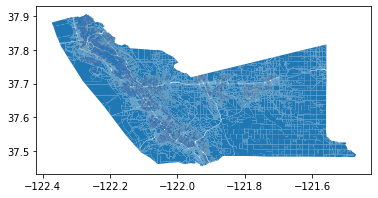

In [201]:
alameda_shp.plot()

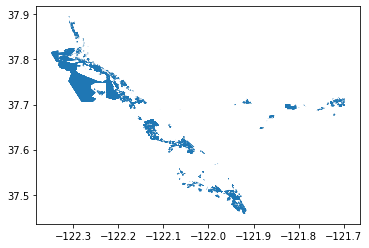

In [202]:
alameda_spatial_join.plot()

### Author: Alice Hua


### References

Pandas on Merge: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html <br>
Geopandas on Spatial Join: http://geopandas.org/mergingdata.html <br>
Geopandas on data structure: http://geopandas.org/data_structures.html <br>
ArcGIS Spatial Join: https://www.youtube.com/watch?v=g9vN0QAWueQ <br>
QGIS Spatial Join: https://www.youtube.com/watch?v=GjE3cq-8CGg